In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy import signal, fft
from datetime import datetime
from salishsea_tools import places

%matplotlib inline
plt.rcParams['font.size'] = 14

## Select locations

In [23]:
locs = ['Campbell River', 'Cherry Point', 'Friday Harbor', 'Nanaimo', 'Neah Bay', 'Sandheads']
meanSSH = {}
for loc in locs:
    meanSSH[loc]=places.PLACES[loc]['mean sea lvl']

## Show recorded, averaged SSH at locations

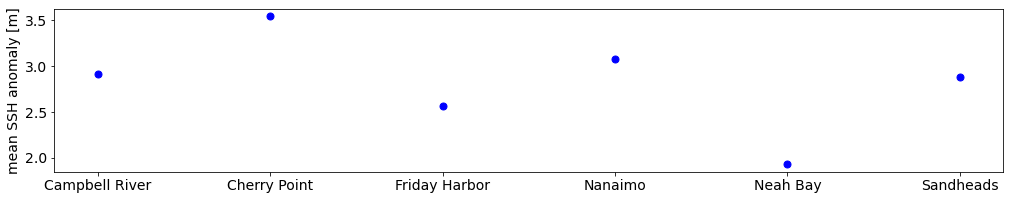

In [28]:
# Plot timeseries
fig, ax = plt.subplots(figsize=(17, 3))
ax.set_ylabel('mean SSH anomaly [m]')
ax.plot(locs, 
        [meanSSH[loc] for loc in locs], 
        'b.', 
        markersize=14)
plt.show()

## Download and plot timeseries for each location (showing recorded average in green)

In [21]:
# Download 2019 Point Atkinson SSH record from erddap
url = 'https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgSurfaceTracerFields1hV19-05'
timerange = ['2019 Jan 1', '2019 Dec 31']
time={}
ssh={}
for loc in locs:
    j, i = places.PLACES[loc]['NEMO grid ji']
    with xr.open_dataset(url) as ds:
        time[loc] = ds.time.sel(time=slice(*timerange)).values.astype('datetime64[s]').astype(datetime)
        ssh[loc] = ds.ssh.sel(time=slice(*timerange)).isel(gridY=j, gridX=i).values

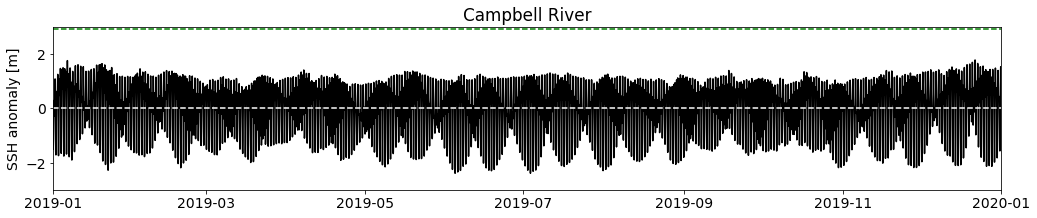

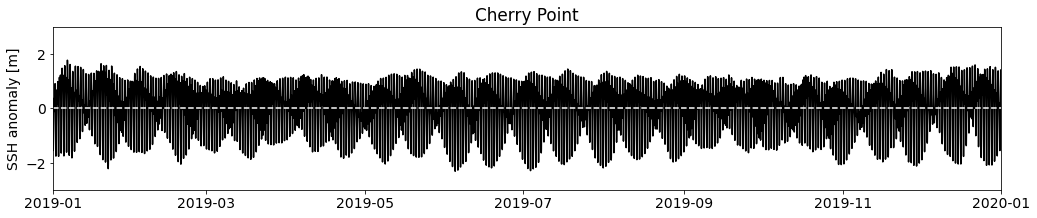

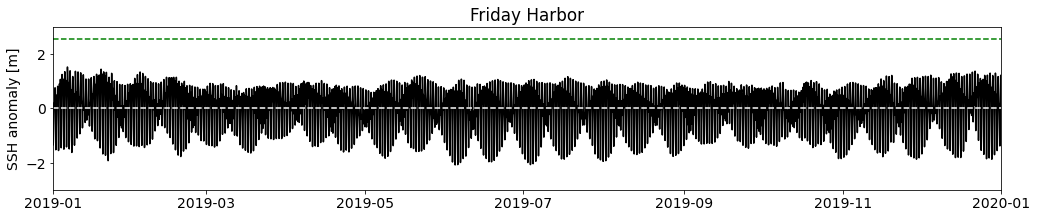

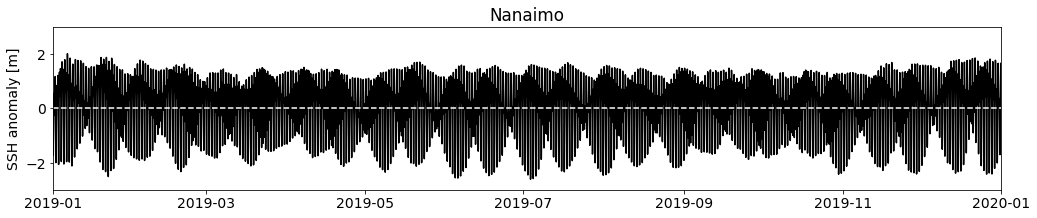

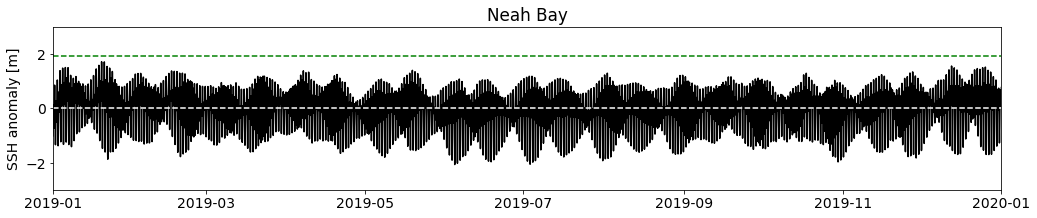

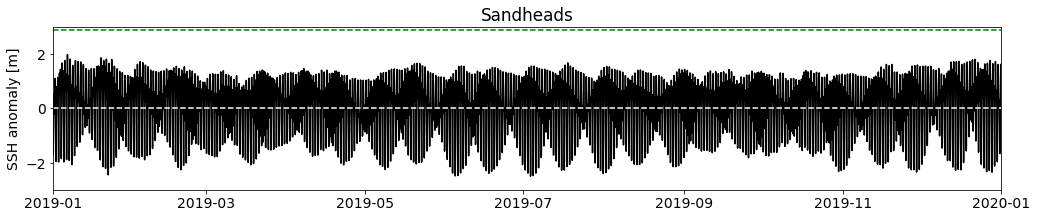

In [31]:
for loc in locs:
    # Plot timeseries
    fig, ax = plt.subplots(figsize=(17, 3))
    xlim, ylim = [datetime(2019, 1, 1), datetime(2020, 1, 1)], [-3, 3]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_ylabel('SSH anomaly [m]')
    ax.set_title(loc)
    ax.plot(time[loc], ssh[loc], 'k-')
    ax.plot(xlim, [0, 0], 'w--')
    ax.plot(xlim,[meanSSH[loc], meanSSH[loc]],'g--')
    plt.show()

## Calculate and plot 7-day running averages at selected locations

In [56]:
ssh_avg = {}
ssh_min = {}
ssh_max = {}
ssh_avg_all = {}

for loc in locs:
    # allocate
    ssh_avg[loc] = np.array([])
    ssh_min[loc] = np.array([])
    ssh_max[loc] = np.array([])

    for i in range(len(time[loc])-168):
        #define running average length (7-days)
        start = 24*i
        end = start + 168    
        #assign
        ssh_avg[loc] = np.append(ssh_avg[loc], ssh[loc][start:end].mean())
        #ssh_min = np.append(ssh_min, ssh[loc][start:end].min())
        #ssh_max = np.append(ssh_max, ssh[loc][start:end].max())

    ssh_avg_all[loc] = ssh[loc].mean()

<ipython-input-56-aeed9cb3e484>:17: RuntimeWarning: Mean of empty slice.
  ssh_avg[loc] = np.append(ssh_avg[loc], ssh[loc][start:end].mean())
/Users/rmueller/opt/miniconda3/envs/standard/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


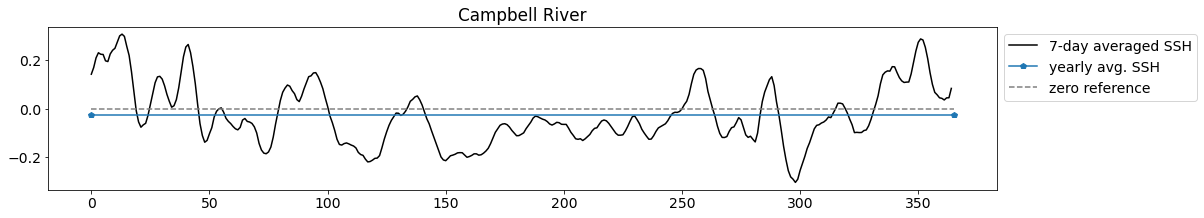

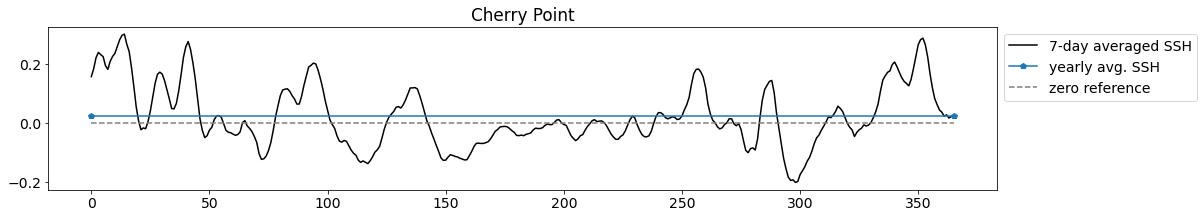

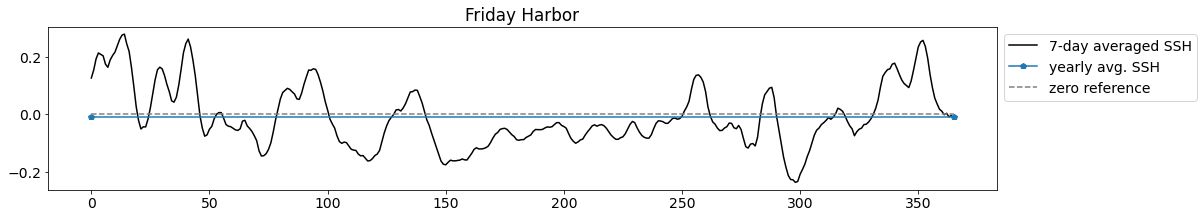

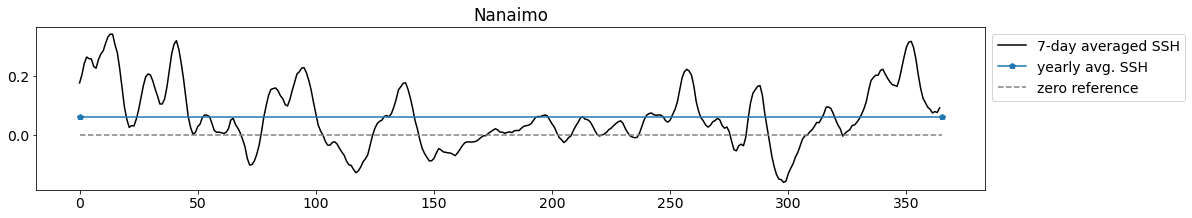

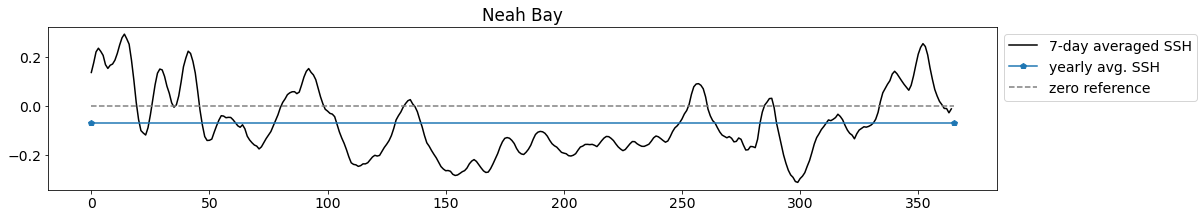

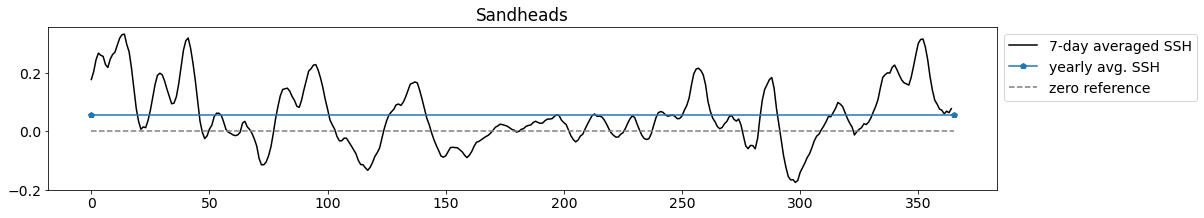

In [68]:
for loc in locs:
    fig, ax = plt.subplots(figsize=(17, 3))
    ax.set_title(loc)
    ax.plot(ssh_avg[loc], 'k-',label='7-day averaged SSH')
    ax.plot([0, 365],[ssh_avg_all[loc], ssh_avg_all[loc]],'p-',label='yearly avg. SSH')
    ax.plot([0, 365], [0, 0], linestyle='dashed',color='grey',label='zero reference')
    ax.legend(bbox_to_anchor=(1,1))
    plt.show()